# **Лабораторная работа 2.1**

Скачиваем нужный датасет.

In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')
df1 = df.sample(100000)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Убираем все статьи выпущенные раньше 2000 года.

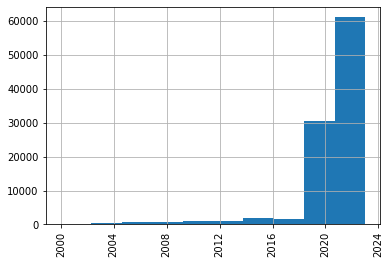

In [ ]:
import matplotlib.pyplot as plt

df1['publish_time'] = pd.to_datetime(df1['publish_time'])
df1['publish_time'] = df1[df1['publish_time'] >= '2000-01-01']['publish_time']
df1['publish_time'] = pd.to_datetime(df1['publish_time'])
df1['publish_time'].hist()

plt.xticks(rotation = 90)
plt.show()

# 1.Топ пять лекарств

Первым заданием будет найти топ пять упоминаний лекарств в абстрактах статей из датасета установленого выше.
Далее код который находит все упоминания для каждого из лекарств и создает словарь с названиями лекарств и частотой упоминаний.

In [ ]:
drg_list = ['hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
num_of_drgs = dict.fromkeys(drg_list, 0)

for abst in df1['abstract']:
    
    if type(abst) is str:
        
        abst = abst.lower()
        for drg in drg_list:
            
            if drg in abst:
                num_of_drgs[drg] += 1
                
num_of_drgs

{'hydroxychloroquine': 611,
 'chloroquine': 715,
 'tocilizumab': 314,
 'remdesivir': 483,
 'azithromycin': 258,
 'lopinavir': 285,
 'ritonavir': 278,
 'dexamethasone': 263,
 'heparin': 280,
 'favipiravir': 155,
 'methylprednisolone': 135}

Оставляем только топ 5. 

In [ ]:
top_five = sorted(num_of_drgs, key=num_of_drgs.get, reverse=True)[:5]

data = {'drug': top_five,
        'count': [ num_of_drgs[x] for x in top_five]}
data


{'drug': ['chloroquine',
  'hydroxychloroquine',
  'remdesivir',
  'tocilizumab',
  'lopinavir'],
 'count': [715, 611, 483, 314, 285]}

Ниже представлена таблица с полученным результатом.

In [ ]:
df2 = pd.DataFrame(data)
df2

,drug,count
0,chloroquine,715
1,hydroxychloroquine,611
2,remdesivir,483
3,tocilizumab,314
4,lopinavir,285


Также представлен наглядный график.

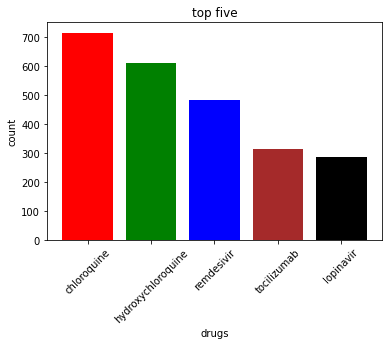

In [ ]:
left = [1, 2, 3, 4, 5]

plt.bar(left, data['count'], tick_label = data['drug'], color = ['red', 'green', 'blue', 'brown', 'black'])
plt.xticks(rotation = 45)

# naming the x-axis
plt.xlabel('drugs')
# naming the y-axis
plt.ylabel('count')
# plot title
plt.title('top five')

plt.show()

# 2. Частота упоминаний по месяцам

Находим количество упоминаний лекарств по месяцам.
Для этого используем код ниже который в итоге возвращает нужный словарь с данными. Переменная drg_list берется из первого задания.


In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
num_of_drgs_monthly = {drg:dict.fromkeys(months, 0) for drg in drg_list }

list1 = zip(df1['abstract'], df1['publish_time'])

for abst, date in list1:
    
    if type(abst) is str and type(date.month_name()) == str:
        
        abst = abst.lower()
        for drg in drg_list:
            
            if drg in abst:
                num_of_drgs_monthly[drg][date.month_name()] += 1


num_of_drgs_monthly

{'hydroxychloroquine': {'January': 379,
  'February': 12,
  'March': 18,
  'April': 23,
  'May': 28,
  'June': 29,
  'July': 28,
  'August': 22,
  'September': 18,
  'October': 18,
  'November': 17,
  'December': 19},
 'chloroquine': {'January': 428,
  'February': 14,
  'March': 22,
  'April': 30,
  'May': 33,
  'June': 35,
  'July': 33,
  'August': 32,
  'September': 20,
  'October': 21,
  'November': 22,
  'December': 24},
 'tocilizumab': {'January': 175,
  'February': 8,
  'March': 8,
  'April': 9,
  'May': 16,
  'June': 14,
  'July': 18,
  'August': 6,
  'September': 13,
  'October': 13,
  'November': 17,
  'December': 16},
 'remdesivir': {'January': 265,
  'February': 9,
  'March': 24,
  'April': 26,
  'May': 24,
  'June': 18,
  'July': 13,
  'August': 16,
  'September': 16,
  'October': 27,
  'November': 24,
  'December': 20},
 'azithromycin': {'January': 157,
  'February': 7,
  'March': 8,
  'April': 9,
  'May': 9,
  'June': 17,
  'July': 13,
  'August': 12,
  'September': 7,
  

Далее представлена удобная таблица с результатами. Месяц январь имеет самую высокую частоту упоминаний, это связано с тем, что когда в статье не упоминается месяц публикации, то автоматически присваивается январь.

In [ ]:
df3 = pd.DataFrame(num_of_drgs_monthly)
df3

,hydroxychloroquine,chloroquine,tocilizumab,remdesivir,azithromycin,lopinavir,ritonavir,dexamethasone,heparin,favipiravir,methylprednisolone
January,379,428,175,265,157,169,168,127,152,88,59
February,12,14,8,9,7,3,4,12,7,4,5
March,18,22,8,24,8,10,10,11,8,8,10
April,23,30,9,26,9,13,14,13,17,2,5
May,28,33,16,24,9,17,18,8,19,6,7
June,29,35,14,18,17,11,10,14,7,7,5
July,28,33,18,13,13,11,11,9,7,5,9
August,22,32,6,16,12,15,14,9,10,12,5
September,18,20,13,16,7,7,4,11,6,5,2
October,18,21,13,27,7,10,9,14,18,7,10


График количества упоминаний лекарства по месяцам (чтобы посмотреть другое лекарство нужно поменять переменную drug на название лекарства).


Text(0.5, 1.0, 'hydroxychloroquine')

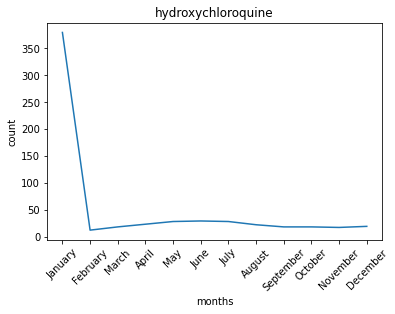

In [ ]:
drug = 'hydroxychloroquine'

# x axis values
x = num_of_drgs_monthly[drug].keys()
# corresponding y axis values
y = num_of_drgs_monthly[drug].values()

plt.xticks(rotation = 45)

# plotting the points 
plt.plot(x, y)

# naming the x axis
plt.xlabel('months')
# naming the y axis
plt.ylabel('count')
  
# giving a title to my graph
plt.title(drug)

# 3. Сравнительная частота упоминаний лекарств

Чтобы найти сравнительную частоту, следует зафиксировать каждую дату когда упоминался препарат. Для этого создаем словарь представленный ниже. 

In [ ]:
num_of_drgs_cont = {}

for drg in drg_list:
    num_of_drgs_cont[drg] = {}
    
num_of_drgs_cont

{'hydroxychloroquine': {},
 'chloroquine': {},
 'tocilizumab': {},
 'remdesivir': {},
 'azithromycin': {},
 'lopinavir': {},
 'ritonavir': {},
 'dexamethasone': {},
 'heparin': {},
 'favipiravir': {},
 'methylprednisolone': {}}

Код ниже находит все даты с упоминаниями для лекарств. Переменная drg_list берется из первого задания.

In [ ]:
from datetime import datetime

list1 = zip(df1['abstract'], df1['publish_time'])

for abst, date in list1:
    date = date.date()
    if type(abst) is str:
        
        abst = abst.lower()
        for drg in drg_list:
            
            if drg in abst:
                
                date = date.__str__()[:7]
                if date in num_of_drgs_cont[drg].keys():
                    num_of_drgs_cont[drg][date] += 1
                else:
                    num_of_drgs_cont[drg][date] = 1
                
            

Ниже представлена таблица с результатами.

In [ ]:
df4 = pd.DataFrame(num_of_drgs_cont )
df4 = df4.fillna(0)

df4





,hydroxychloroquine,chloroquine,tocilizumab,remdesivir,azithromycin,lopinavir,ritonavir,dexamethasone,heparin,favipiravir,methylprednisolone
2021-06-29,4.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
2020-01-01,880.0,1016.0,292.0,444.0,364.0,412.0,420.0,112.0,184.0,160.0,72.0
2021-01-01,524.0,560.0,344.0,492.0,220.0,216.0,204.0,324.0,280.0,136.0,108.0
2020-12-31,8.0,8.0,12.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-22,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2021-11-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2011-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2011-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 4. Связь диагнозов и препаратов

Чтобы найти данную связь, находим фиксируем каждый случай когда в одном абстракте упоминается лекарство и болезнь. Однако сначала мы создаем матрицу который будет представлять связи лекарств и болезней.



In [ ]:
import numpy as np

drg_list = ['hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnoses = ['covid', 'sars', 'pneumonia', 'infection', 'diabetes', 'coronavirus', 'death']

arr = np.zeros((len(drg_list), len(diagnoses)))
arr


array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

Находим связи. Полученная матрица представлена ниже. 

In [ ]:
for abst in df1['abstract']:
    
    if type(abst) is str:
        abst = abst.lower()
        
        for i,drg in enumerate(drg_list):
            for j,diag in enumerate(diagnoses):
                if drg in abst and diag in abst:
                    arr[i, j] += 1
                
arr

array([[550., 308., 164., 444.,  85., 544., 216.],
       [629., 359., 195., 560.,  98., 661., 250.],
       [277., 138., 136., 272.,  50., 234., 136.],
       [386., 268.,  94., 317.,  45., 398., 124.],
       [221., 112.,  99., 188.,  28., 197.,  95.],
       [227., 157.,  85., 192.,  27., 274.,  69.],
       [215., 146.,  91., 204.,  25., 255.,  72.],
       [198., 105.,  93., 201.,  35., 191., 101.],
       [217.,  94.,  87., 206.,  24., 205.,  77.],
       [119.,  75.,  46.,  82.,   6., 115.,  27.],
       [116.,  65.,  92., 142.,  14., 114.,  58.]])

Также представлен график, где более яркие квадраты показывают более сильную связь.

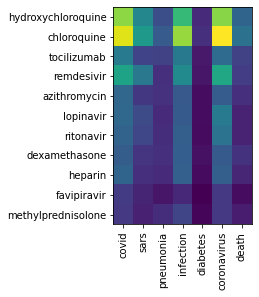

In [ ]:
plt.imshow(arr)
plt.yticks(range(len(drg_list)), drg_list)
plt.xticks(range(len(diagnoses)), diagnoses, rotation=90)
plt.show()